In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datareader import read_data, algs, display_ranks, combine_all_metrics

# Readin data

In [3]:
data, scores, test_users = read_data('Results for AMZBeauty', 'AMZB')

In [4]:
all_metrics = combine_all_metrics(scores, data)

In [5]:
all_metrics.head()

,rank,step,model,Stability,HR,MRR,COV
0,10,Step_2,PureSVD,0.504408,0.107527,0.086534,0.013421
1,10,Step_2,PSI,0.859560,0.096774,0.081362,0.012149
2,10,Step_3,PureSVD,0.528803,0.123810,0.102394,0.012496
3,10,Step_3,PSI,0.915952,0.111111,0.095908,0.012727
4,10,Step_4,PureSVD,0.544095,0.183453,0.166487,0.012727


# Stability

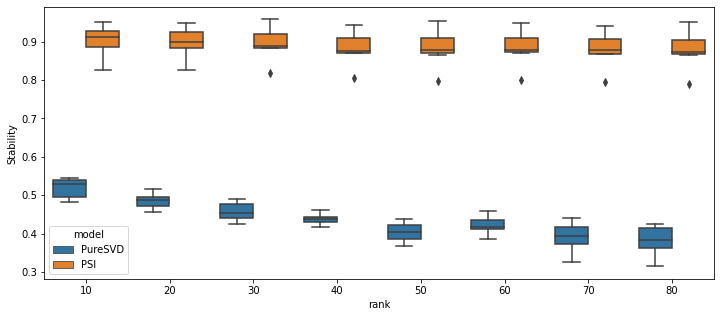

In [6]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='Stability', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

# HR

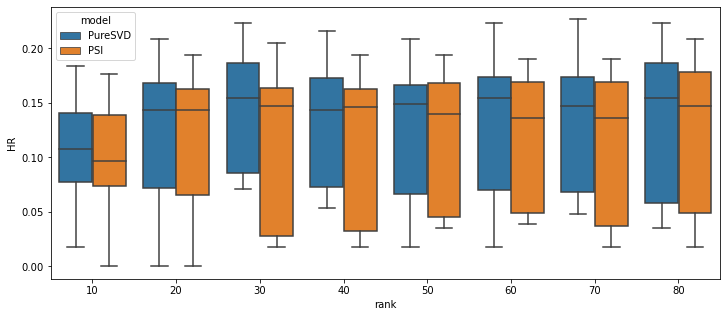

In [7]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='HR', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

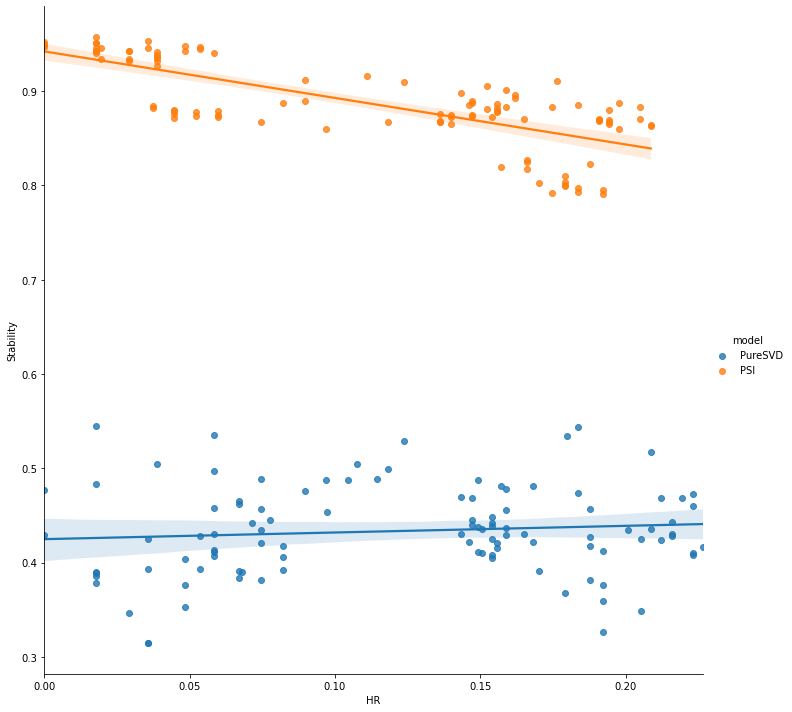

In [8]:
sns.lmplot(x='HR', y='Stability', hue='model', data=all_metrics, height=10)

## MRR

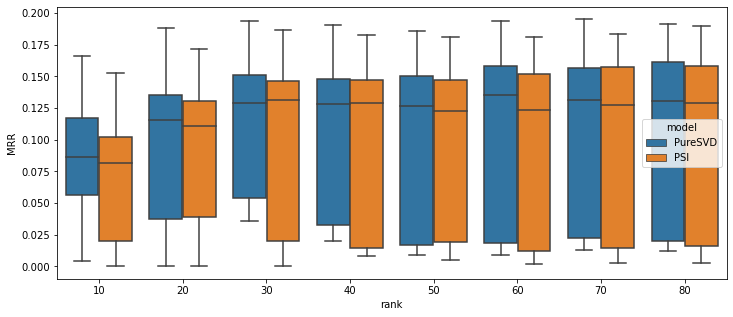

In [9]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='MRR', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

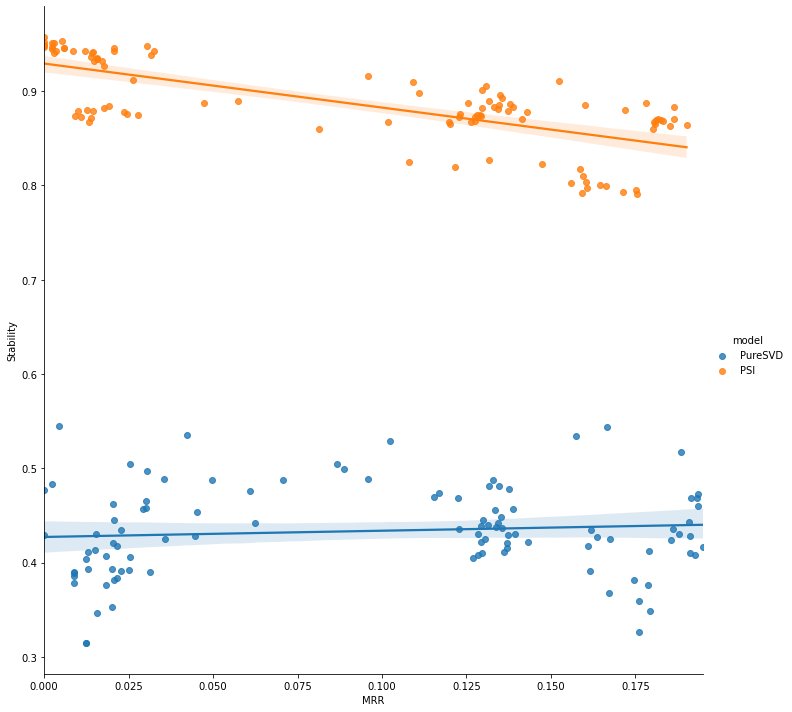

In [10]:
sns.lmplot(x='MRR', y='Stability', hue='model', data=all_metrics, height=10)

## Coverage

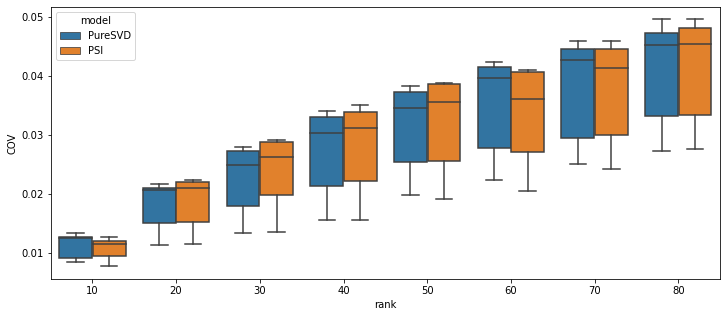

In [11]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x='rank', y='COV', hue='model',
    data=all_metrics.query('rank in @ display_ranks')
)

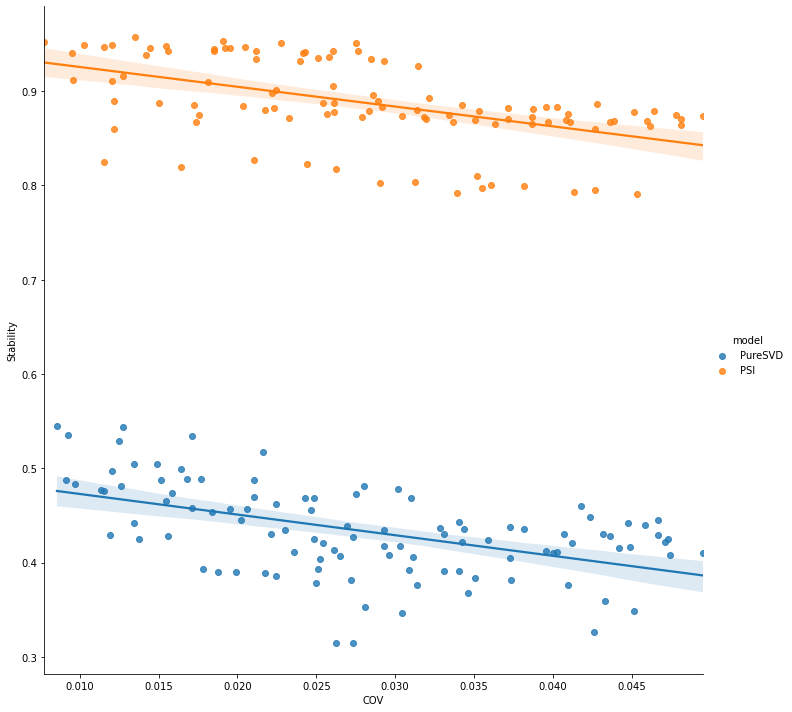

In [12]:
sns.lmplot(x='COV', y='Stability', hue='model', data=all_metrics, height=10)

# Other views

## HR

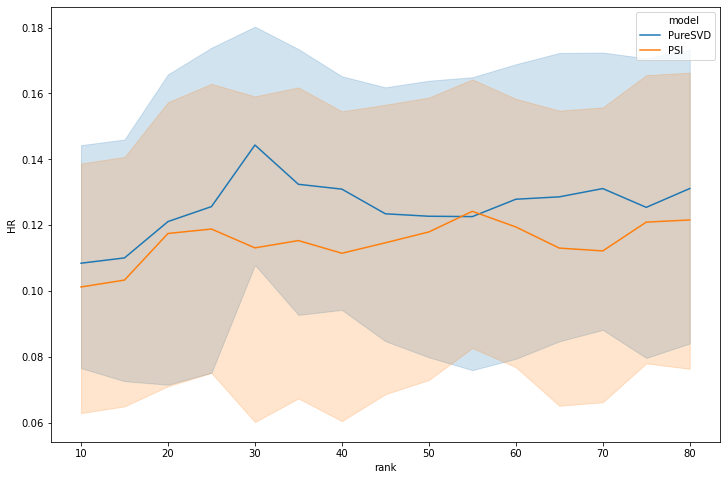

In [13]:
metric = 'HR'

plt.figure(figsize=(12, 8))
# sns.lineplot(data=mrr_data, x='rank', y='mrr', hue='model', err_style='bars', ci=95, err_kws=dict(capsize=10, capthick=2))
sns.lineplot(data=scores[metric]['long'], x='rank', y=metric, hue='model')

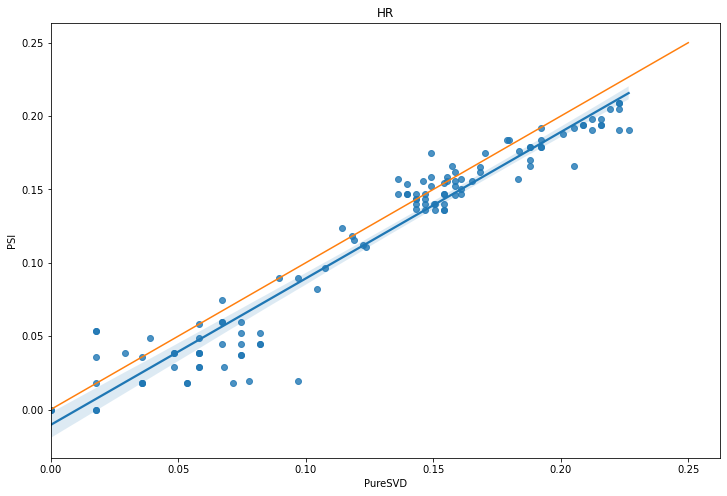

In [26]:
metric = 'HR'

plt.figure(figsize=(12, 8))
ax = sns.regplot(data=scores[metric]['wide'], x='PureSVD', y='PSI')
ax.plot([0.000, 0.25], [0.00, 0.25])
ax.set_title(metric);

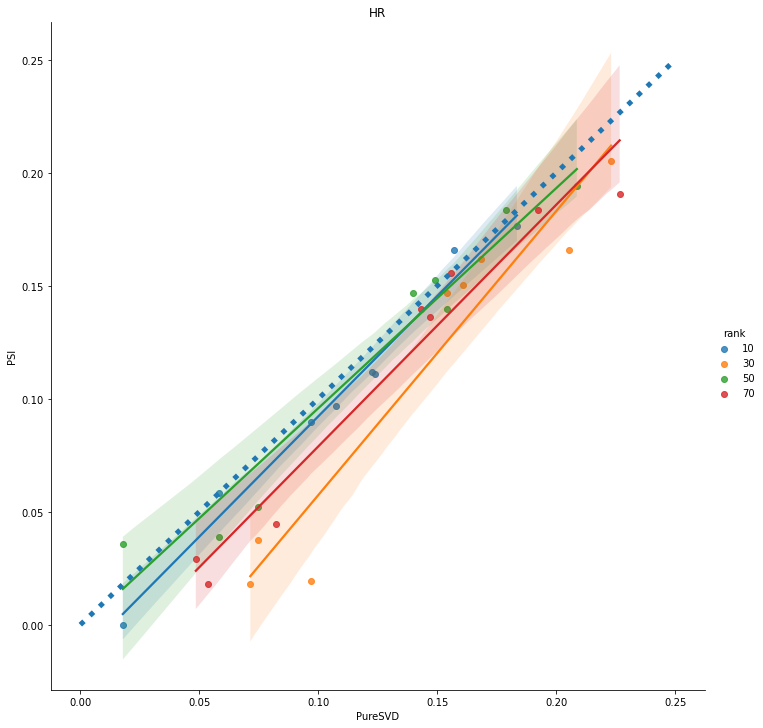

In [27]:
metric = 'HR'

g = sns.lmplot(
    data=scores[metric]['wide'].loc[[10, 30, 50, 70]].reset_index(),
    x="PureSVD", y="PSI", hue="rank",
    height=10
)
g.ax.plot([0.0, 0.25], [0.0, 0.25], ls=':', lw=5)
g.ax.set_title(metric);
# Use more informative axis labels than are provided by default
# g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

## MRR

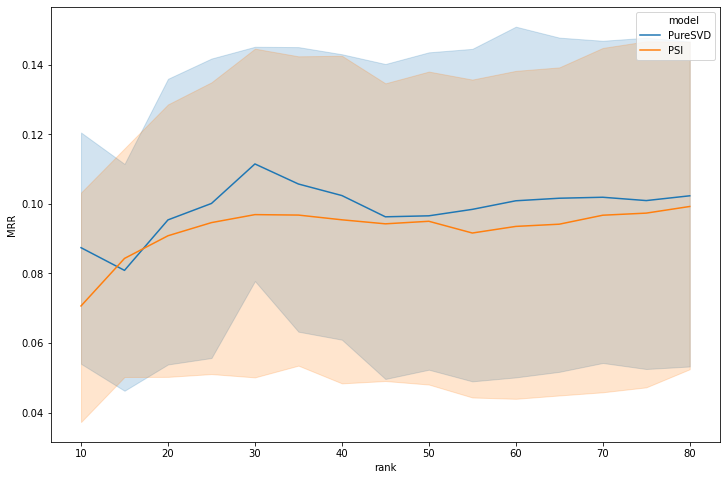

In [28]:
metric = 'MRR'

plt.figure(figsize=(12, 8))
# sns.lineplot(data=mrr_data, x='rank', y='mrr', hue='model', err_style='bars', ci=95, err_kws=dict(capsize=10, capthick=2))
sns.lineplot(data=scores[metric]['long'], x='rank', y=metric, hue='model')

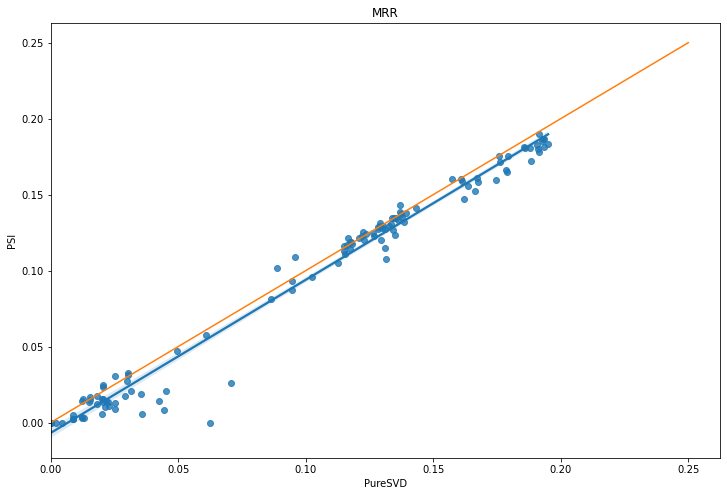

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(data=scores[metric]['wide'], x='PureSVD', y='PSI')
ax.plot([0.00, 0.25], [0.00, 0.25])
ax.set_title(metric);

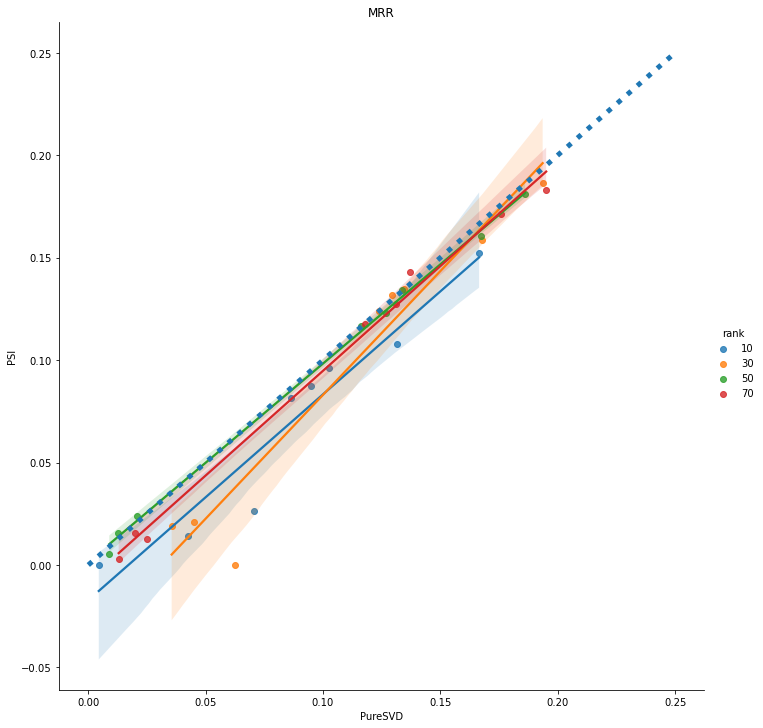

In [30]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=scores[metric]['wide'].loc[[10, 30, 50, 70]].reset_index(),
    x="PureSVD", y="PSI", hue="rank",
    height=10
)
g.ax.plot([0.0, 0.25], [0.0, 0.25], ls=':', lw=5)
g.ax.set_title(metric);
# Use more informative axis labels than are provided by default
# g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

## Coverage

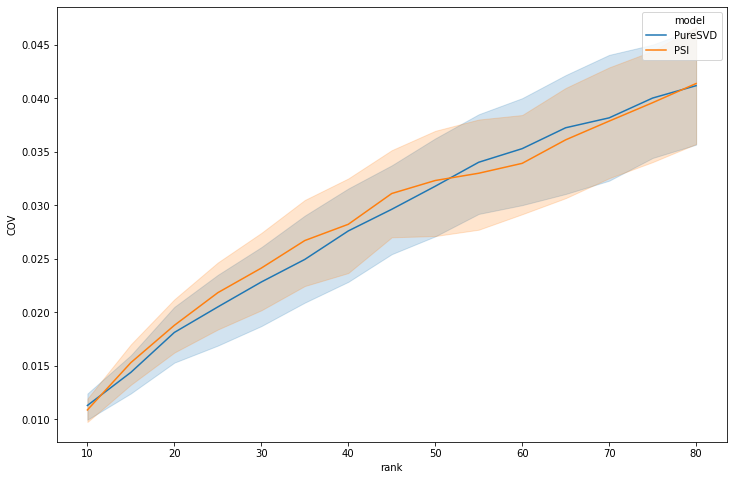

In [31]:
metric = 'COV'

plt.figure(figsize=(12, 8))
# sns.lineplot(data=mrr_data, x='rank', y='mrr', hue='model', err_style='bars', ci=95, err_kws=dict(capsize=10, capthick=2))
sns.lineplot(data=scores[metric]['long'], x='rank', y=metric, hue='model')

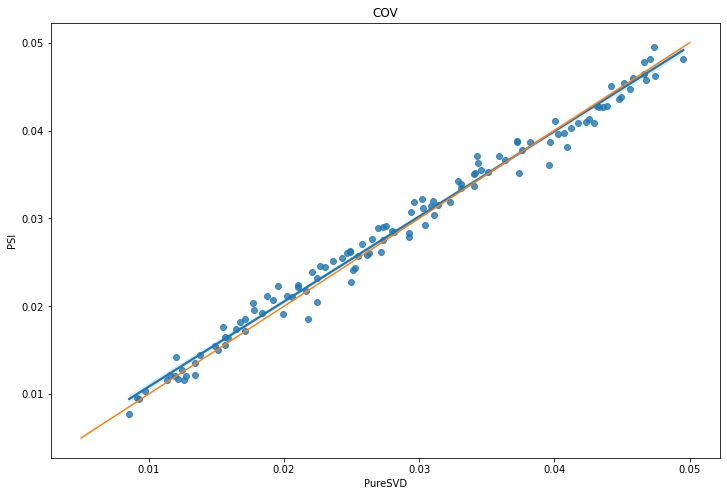

In [36]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(data=scores[metric]['wide'], x='PureSVD', y='PSI')
ax.plot([0.005, 0.05], [0.005, 0.05])
ax.set_title(metric);

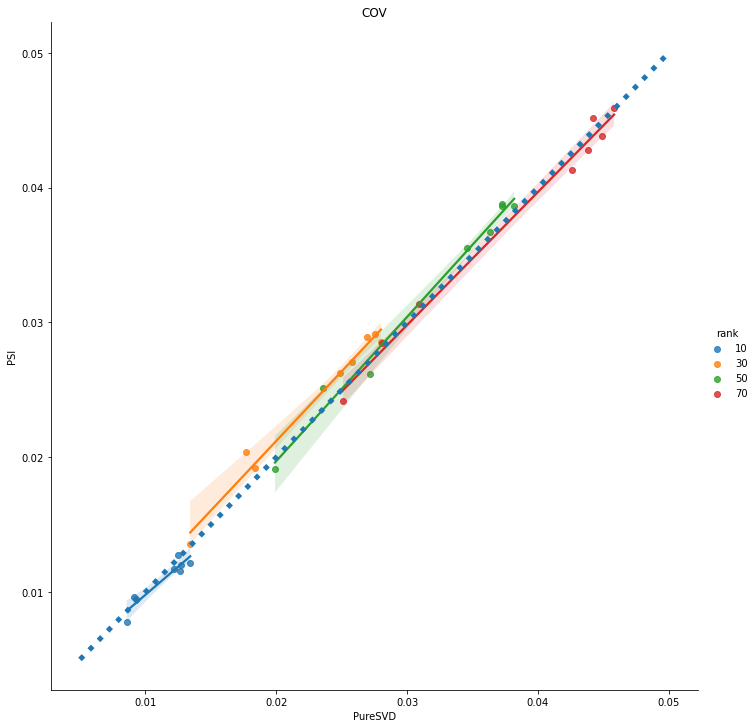

In [37]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=scores[metric]['wide'].loc[[10, 30, 50, 70]].reset_index(),
    x="PureSVD", y="PSI", hue="rank",
    height=10
)
g.ax.plot([0.005, 0.05], [0.005, 0.05], ls=':', lw=5)
g.ax.set_title(metric);
# Use more informative axis labels than are provided by default
# g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

## Stability

In [22]:
stab_avg = pd.concat(
    [
        data[alg]['Stability_df'].groupby(['rank', 'step'])[['Stability']].mean()
        for alg in algs
    ],
    keys = algs,
    axis=0
).rename_axis(index=['model', 'rank', 'step']).reset_index()
stab_avg.head()

,model,rank,step,Stability
0,PureSVD,10,step_1,0.504408
1,PureSVD,10,step_2,0.528803
2,PureSVD,10,step_3,0.544095
3,PureSVD,10,step_4,0.481527
4,PureSVD,10,step_5,0.487709


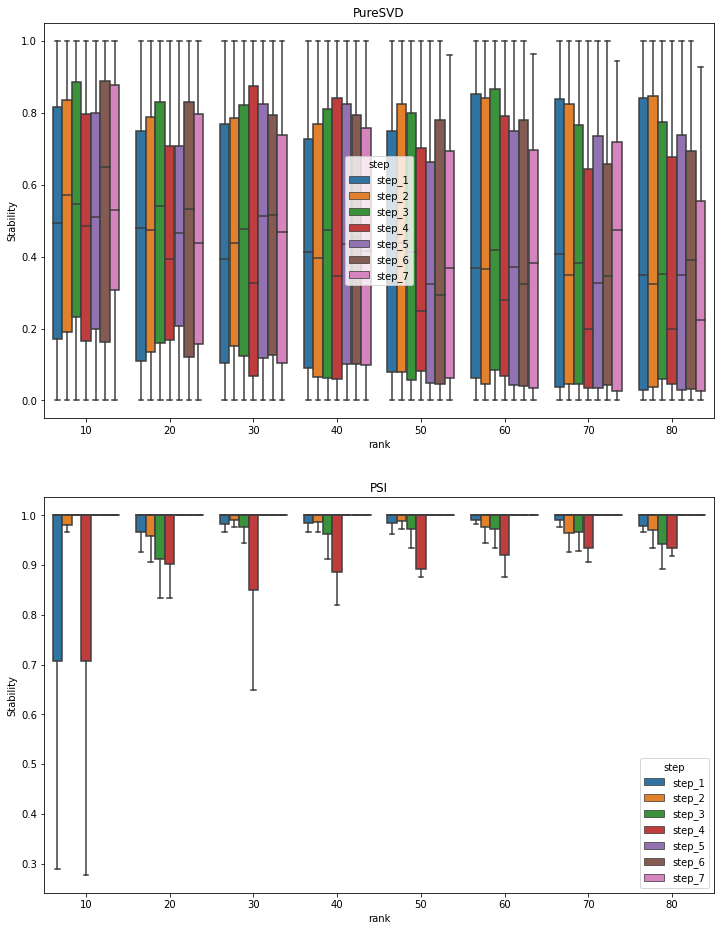

In [23]:
fig, axes = plt.subplots(len(algs), 1, figsize=(12, len(algs)*8))
for ax, alg in zip(axes, algs):
    sns.boxplot(ax=ax, x="rank", y="Stability", hue="step", showfliers=False,
                data=data[alg]['Stability_df'].query('rank in @display_ranks'))
    ax.set_title(alg);
# sns.despine(offset=10, trim=True)

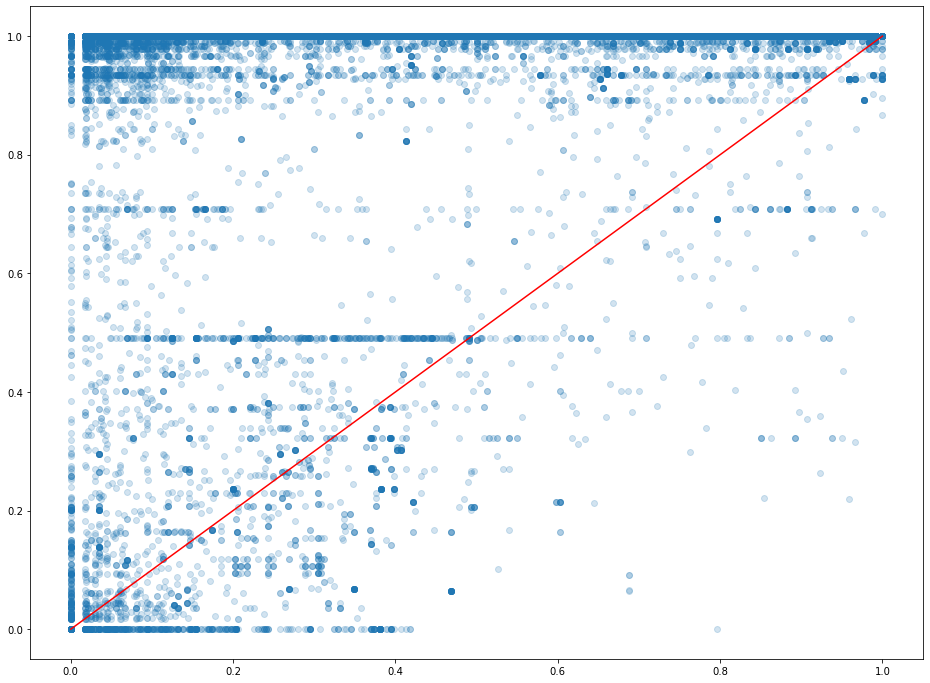

In [24]:
plt.figure(figsize=(16, 12))
plt.scatter(
    x=data[algs[0]]['Stability_df']['Stability'].sort_index(), # SVD
    y=data[algs[1]]['Stability_df']['Stability'].sort_index(), # PSI
    alpha=0.2
)
plt.plot([0, 1], [0, 1], c='r');

## UPD